<a href="https://colab.research.google.com/github/Balasakthivelpandis/BizCardX/blob/main/Guvi_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project - Customer Conversion Prediction

##important library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# For ignore warnings
import warnings
warnings.filterwarnings("ignore")

##import data

In [2]:
data = pd.read_csv('/content/train (1).csv')

In [3]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
data.shape

(45211, 11)

In [7]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [8]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## Percentage of y columns

In [9]:
data['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

### Bar plot of freequencies

<Axes: >

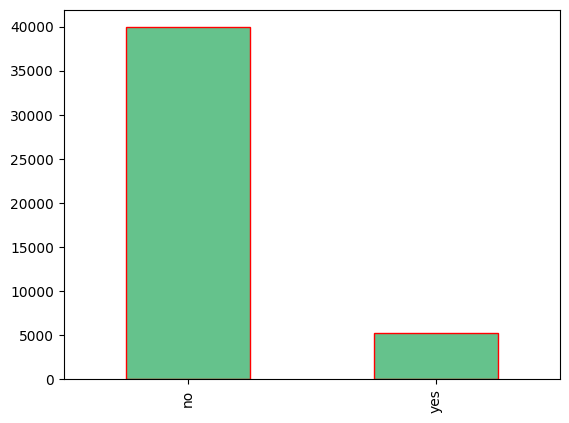

In [10]:
data['y'].value_counts().plot.bar(color = np.random.rand(3,), ec='red')

##look at the distribution of age variable to see how many people belongs to a particular age group.

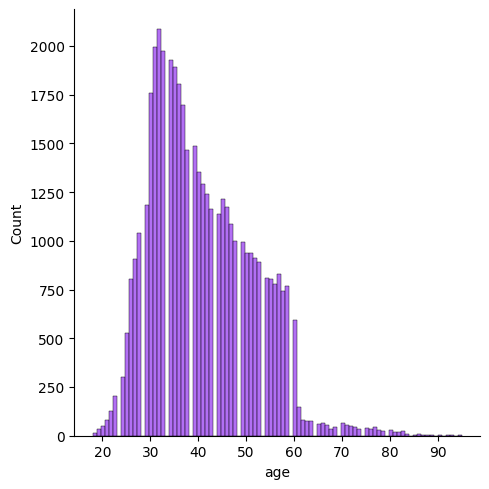

In [11]:
sn.displot(data["age"], color=np.random.rand(3,))

##The  most of the clients fall in the age group between 20-60.
##look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table.

<Axes: >

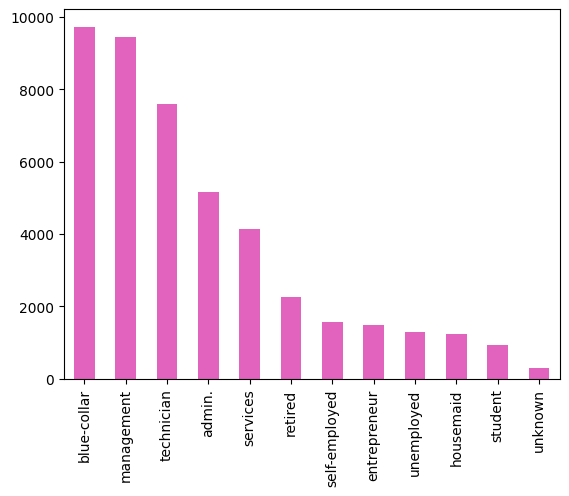

In [12]:
data['job'].value_counts().plot.bar(color = np.random.rand(3,))

##We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit.
## look at the education background of the customes.

<Axes: >

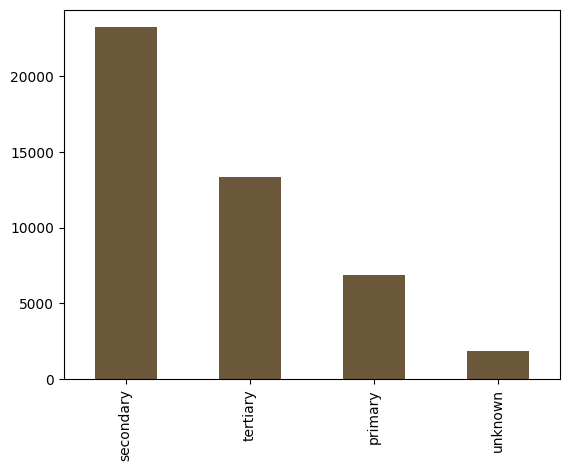

In [13]:
data['education_qual'].value_counts().plot.bar(color = np.random.rand(3,))

## the most of our clients are secondary or tertiary level of education.

##Bivariate Analysis

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


Text(0, 0.5, 'Percentage')

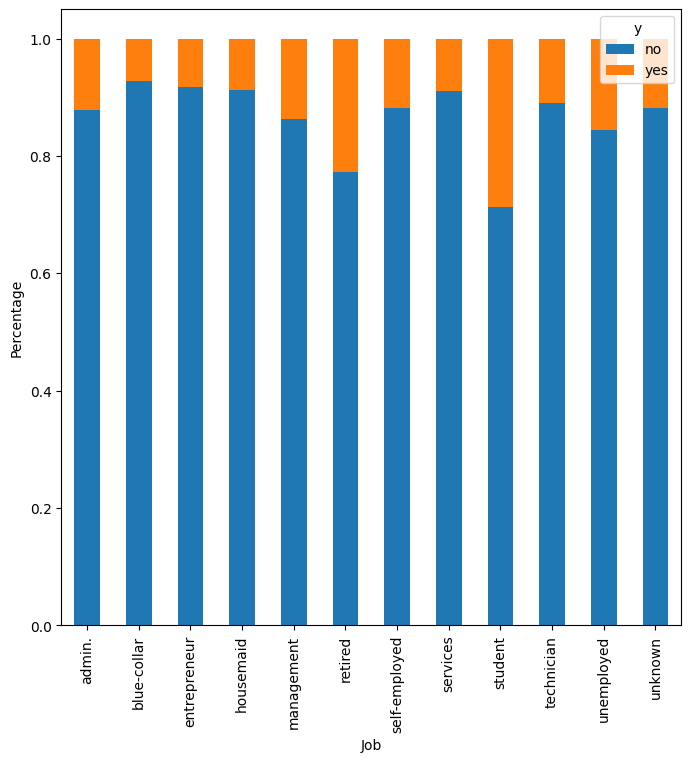

In [14]:
print(pd.crosstab(data['job'],data['y']))

job=pd.crosstab(data['job'],data['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

##From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.



##Explore the 'education_qual' variable against the 'y' variable.

y                  no   yes
education_qual             
primary          6260   591
secondary       20752  2450
tertiary        11305  1996
unknown          1605   252


Text(0, 0.5, 'Percentage')

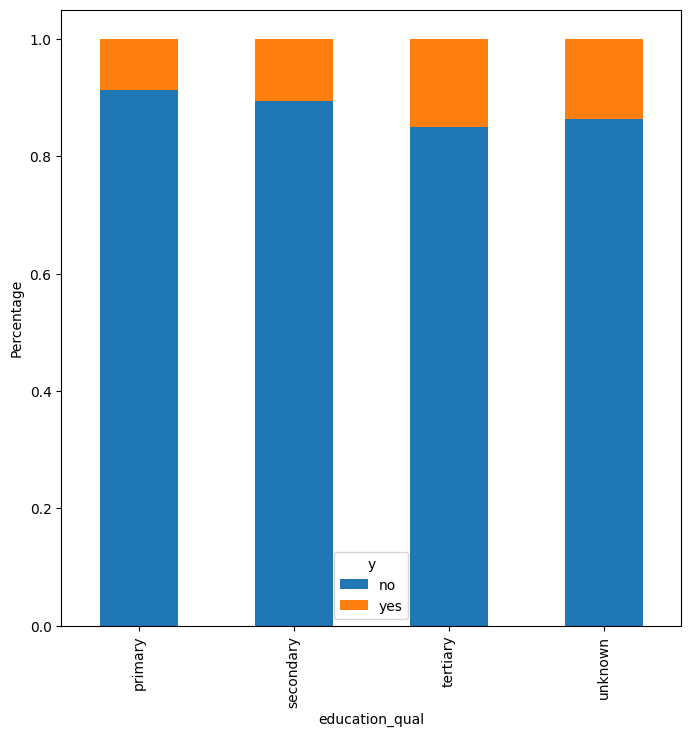

In [15]:
print(pd.crosstab(data['education_qual'],data['y']))

education_qual=pd.crosstab(data['education_qual'],data['y'])
education_qual.div(education_qual.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('education_qual')
plt.ylabel('Percentage')

## clients having education_qual : tertiary and unknown have slightly higher chances of subscribing to a insurance policy as compared to the other clients.

y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912


Text(0, 0.5, 'Percentage')

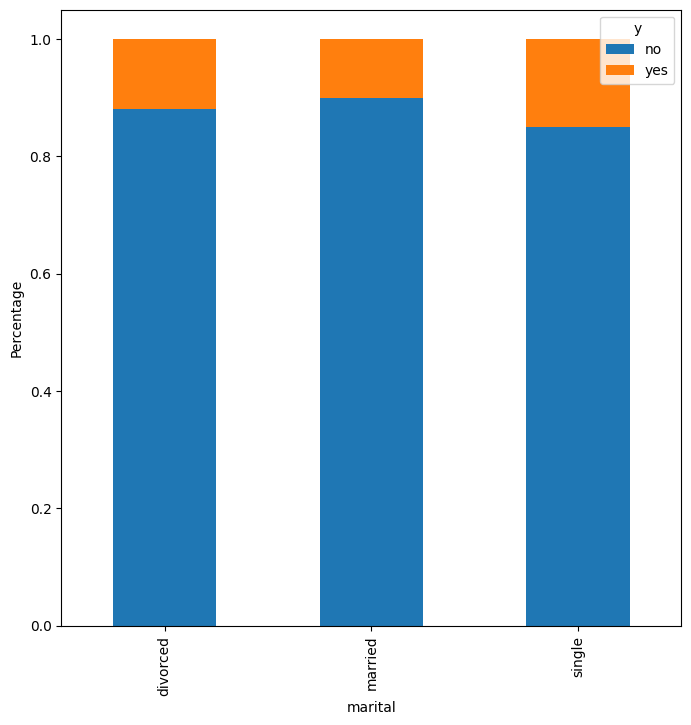

In [16]:

print(pd.crosstab(data['marital'],data['y']))

marital=pd.crosstab(data['marital'],data['y'])
marital.div(marital.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('marital')
plt.ylabel('Percentage')

##  The singles and divorced clients are likely to more subscribed to insurance policy than married clients.

##Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [17]:
data['y'].replace('no', 0,inplace=True)
data['y'].replace('yes', 1,inplace=True)

<Axes: >

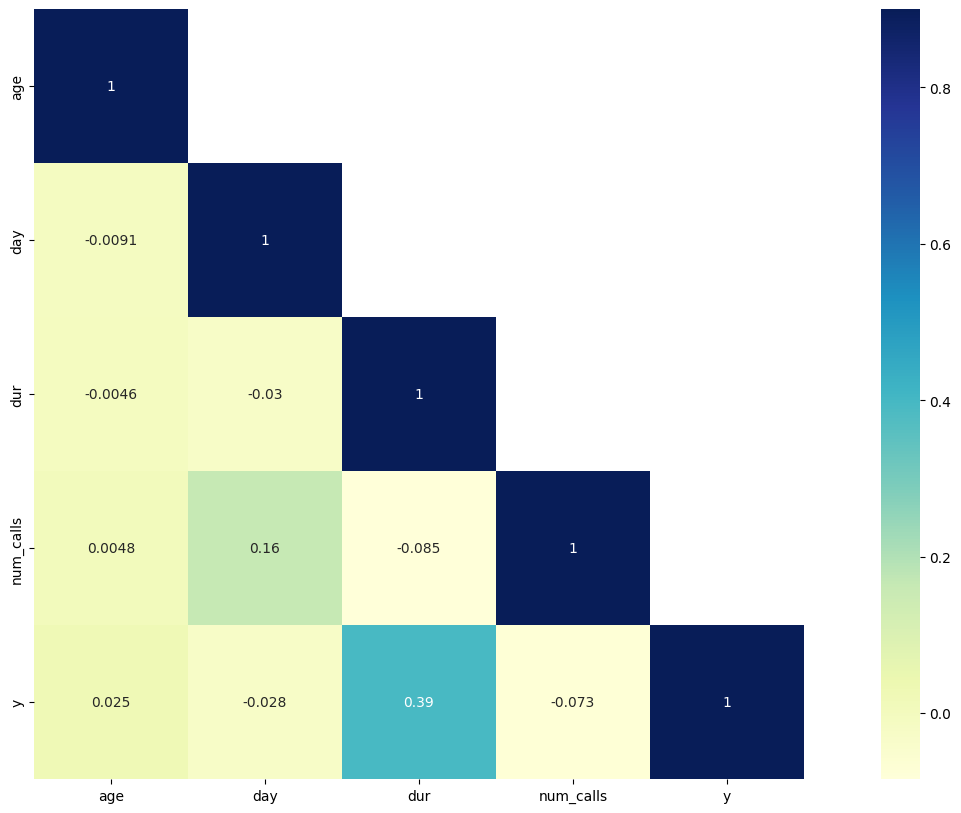

In [18]:

corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

##that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

In [19]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

##There are no missing values in the dataset.

##As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We'll apply dummies. We will also remove the target variable and keep it in a separate variable.

##Model Building

In [20]:
target = data['y']
data = data.drop('y',1)

##Apply dummies on dataset.

In [22]:
data = pd.get_dummies(data)

##We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 25% data as validation set and rest as the training set.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.25, random_state = 42)

##Now our data is ready. For classification problem we gonna use Logistic Regression Model. Let's build the model.

##Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lreg = LogisticRegression()

## fiting the model on our data.

In [29]:
lreg.fit(X_train,Y_train)

LogisticRegression()

In [30]:
L_pred = lreg.predict(X_test)

##Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is AUC-ROC, let's calculate the accuracy on test set.

In [31]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [32]:
print("Accuracy Score of Logistic Reg:",round(accuracy_score(Y_test, L_pred),2))

Accuracy Score of Logistic Reg: 0.9


In [33]:
L_AUC_ROC = roc_auc_score(Y_test, L_pred)
print("ROC AUC Score of Logistic Reg:",round((L_AUC_ROC),2))

ROC AUC Score of Logistic Reg: 0.66


##Here for better ROC AUC SCORE we'll use Decision Tree Classifier Model. It do not have liniarity bound so let's what'll get if our data have non linearity?

##Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc = DecisionTreeClassifier(random_state=0, splitter='best')

In [36]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
D_pred = dtc.predict(X_test)

In [38]:
print("Accuracy Score of Decision Tree Cl:",round(accuracy_score(Y_test, D_pred), 1))

Accuracy Score of Decision Tree Cl: 0.9


In [39]:
D_AUC_ROC = roc_auc_score(Y_test, D_pred)
print("ROC AUC Score of Decision Tree Cl:",round(D_AUC_ROC, 2))

ROC AUC Score of Decision Tree Cl: 0.7


##K Neighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
KNC = KNeighborsClassifier()

In [42]:
KNC.fit(X_train, Y_train)

KNeighborsClassifier()

In [43]:
K_pred = KNC.predict(X_test)

In [44]:
print("Accuracy Score of K Neighbors Cl:",round(accuracy_score(Y_test, K_pred), 2))

Accuracy Score of K Neighbors Cl: 0.88


In [45]:
K_AUC_ROC = roc_auc_score(Y_test, K_pred)
print("ROC AUC Score of K Neighbors Cl:",round(K_AUC_ROC, 2))

ROC AUC Score of K Neighbors Cl: 0.6


##Conclusion:
##As our evalution metrix is AUROC. Here, we can see that our Decision Tree Classifier Model have ROC AUC Score of 0.7 and as well as Accuracy Score around 0.9.

##So, We will use Desicion Tree Model and it'll predict output as much as 90% good. So it model's predicted output data will help our companies employ to direct target, agreeable or conversion clients more effectively and convert them to happy customer. So it'll save time of employ as well as company'.

##In the end this predictions will help company to run time saver and cost effective tele marketing campaigns with better customer conversion ratio.

##We can also design camaign were: employ will connect to prospect clients first, from the predicted output and successfully sell them term insurance.